In [84]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/raw/supermarket_sales.csv')

In [85]:
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [86]:
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [73]:
df['year_month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
df['hour'] = df['Time'].str.split(':').str[0].astype(int)

In [81]:
profile = ProfileReport(df, minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [74]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,year_month,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02,10


In [38]:
payment = df.groupby(["Payment","year_month"])
payment.size()

Payment      year_month
Cash         2019-01       122
             2019-02       112
             2019-03       110
Credit card  2019-01       113
             2019-02        90
             2019-03       108
Ewallet      2019-01       117
             2019-02       101
             2019-03       127
dtype: int64

In [62]:
df_payment = payment.agg({
    'cogs': 'sum',
    'gross income': 'sum',
    'Total': 'sum',
    'Tax 5%': 'sum',
    'Rating': 'mean',
}).reset_index()

In [63]:
df_payment.head()

,Payment,year_month,cogs,gross income,Total,Tax 5%,Rating
0,Cash,2019-01,39781.03,1989.0515,41770.0815,1989.0515,6.958197
1,Cash,2019-02,34044.13,1702.2065,35746.3365,1702.2065,6.958036
2,Cash,2019-03,33038.24,1651.9120,34690.1520,1651.9120,6.995455
3,Credit card,2019-01,36425.31,1821.2655,38246.5755,1821.2655,6.896460
4,Credit card,2019-02,29866.69,1493.3345,31360.0245,1493.3345,7.138889


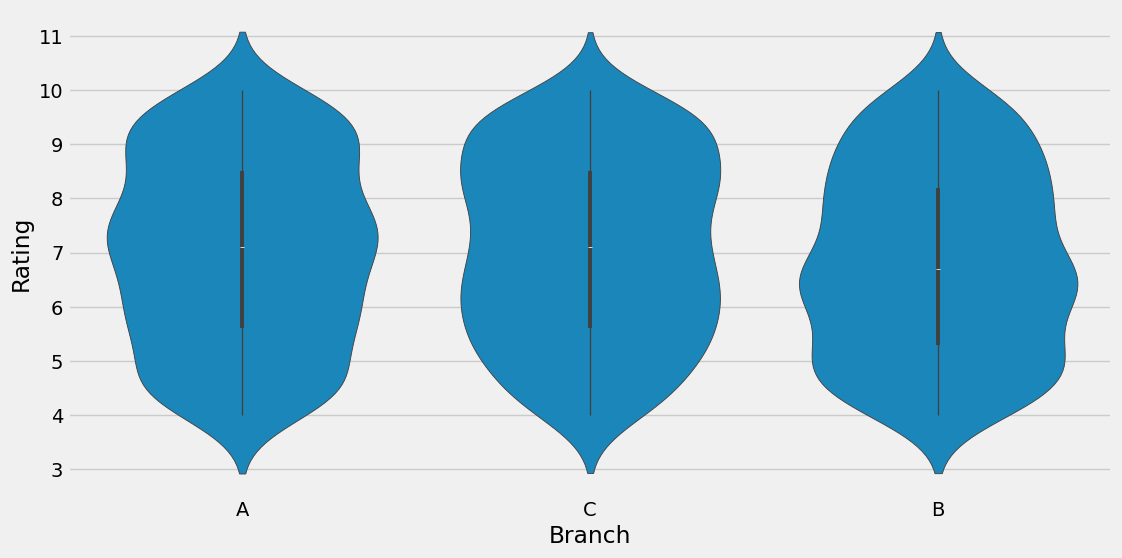

In [54]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='Branch', y='Rating')
plt.show()

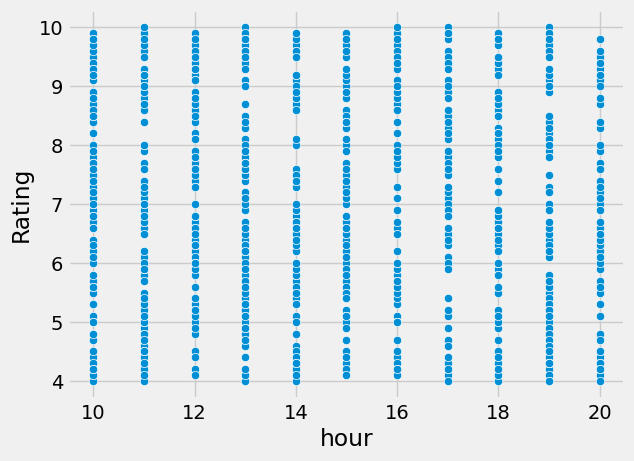

In [75]:
sns.scatterplot(data=df, x='hour', y='Rating')
plt.show()

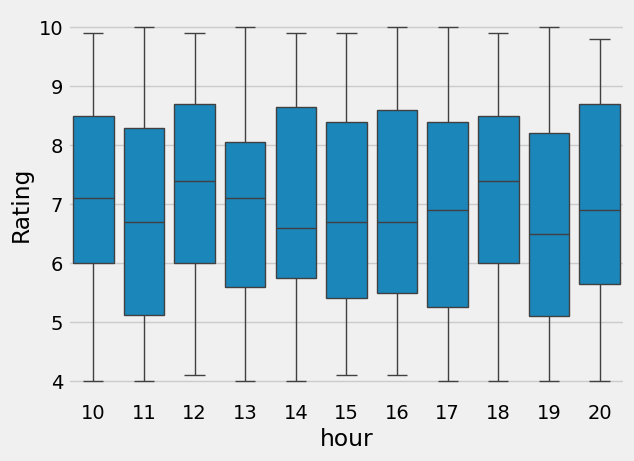

In [76]:
sns.boxplot(data=df, x='hour', y='Rating')
plt.show()

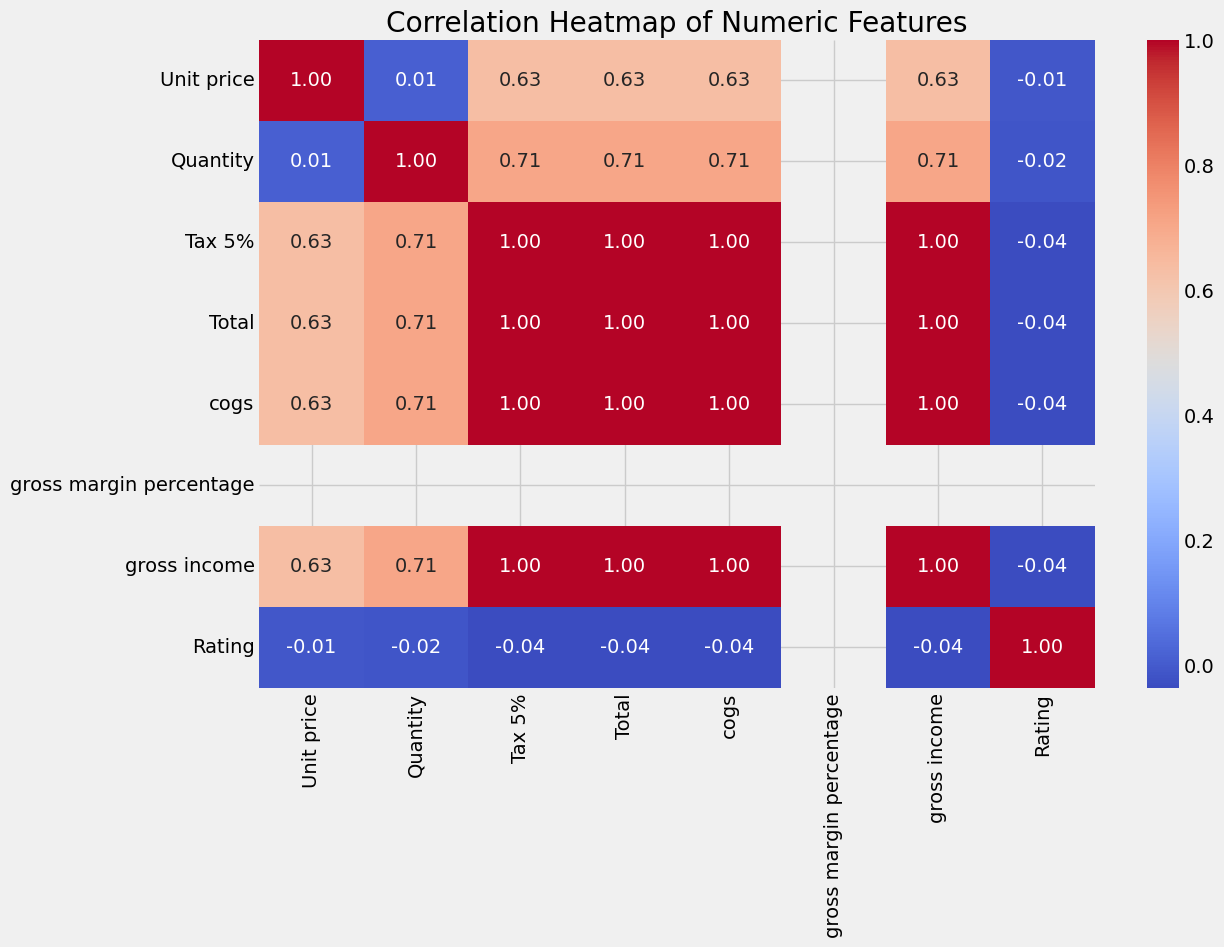

In [69]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [77]:
hour = df.groupby('hour')
df_hour = hour.agg({
    'cogs': 'sum',
    'gross income': 'sum',
    'Total': 'sum',
    'Tax 5%': 'sum',
    'Rating': 'mean',
}).reset_index()

In [79]:
df_hour.head()

,hour,cogs,gross income,Total,Tax 5%,Rating
0,10,29925.22,1496.2610,31421.4810,1496.2610,7.098020
1,11,28930.79,1446.5395,30377.3295,1446.5395,6.806667
2,12,24824.65,1241.2325,26065.8825,1241.2325,7.300000
3,13,33069.74,1653.4870,34723.2270,1653.4870,7.030097
4,14,29360.38,1468.0190,30828.3990,1468.0190,6.934940


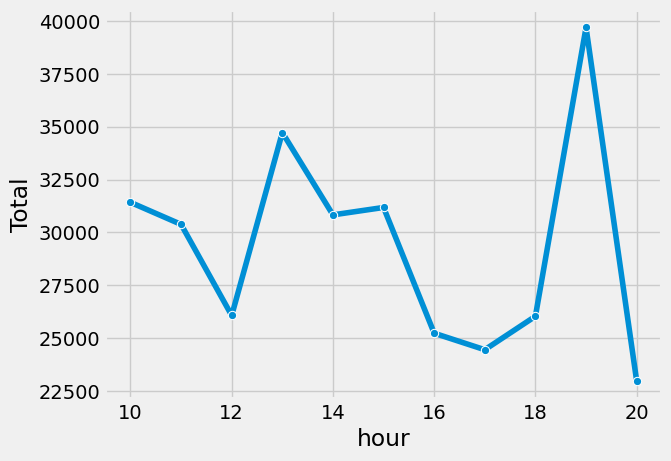

In [80]:
sns.lineplot(data=df_hour, x='hour', y='Total', marker='o')
plt.show()

In [83]:
branch_city = df.groupby(["Branch","City"])
branch_city.size()

Branch  City     
A       Yangon       340
B       Mandalay     332
C       Naypyitaw    328
dtype: int64

In [89]:
from sqlalchemy import create_engine, text

# 建立資料庫連線
engine = create_engine("sqlite:///supermarket.db")

# SQL查詢語句
query = """
SELECT name FROM sqlite_master WHERE type = 'table';
"""

# 使用pandas讀取SQL查詢結果
df = pd.read_sql(query, engine)
print(df)


            name
0       branches
1  product_lines
2       products
3          sales


In [112]:
query = """
WITH monthly_sales AS (
    SELECT 
        date(date, 'start of month') as month_date,
        strftime('%Y-%m', date) as month_str,
        strftime('%Y', date) as year,
        strftime('%m', date) as month,
        b.city,
        pl.name as product_line,
        SUM(s.total) as total_sales,
        COUNT(*) as transaction_count,
        AVG(s.rating) as avg_rating,
        
        -- 前一個月的銷售額
        LAG(SUM(s.total)) OVER (
            PARTITION BY b.city, pl.name 
            ORDER BY date(date, 'start of month')
        ) as prev_month_sales,
        
        -- 增長率
        ROUND(((
            SUM(s.total) - LAG(SUM(s.total)) OVER (
                PARTITION BY b.city, pl.name 
                ORDER BY date(date, 'start of month')
            )
        ) / NULLIF(LAG(SUM(s.total)) OVER (
            PARTITION BY b.city, pl.name 
            ORDER BY date(date, 'start of month')
        ), 0) * 100), 2) as growth_rate,
        
        -- 三個月移動平均
        AVG(SUM(s.total)) OVER (
            PARTITION BY b.city, pl.name 
            ORDER BY date(date, 'start of month')
            ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
        ) as moving_avg_3months
        
    FROM sales s
    JOIN branches b ON s.branch_id = b.id
    JOIN products p ON s.product_id = p.id
    JOIN product_lines pl ON p.product_line_id = pl.id
    GROUP BY month_date, b.city, pl.name
)
SELECT 
    month_date,
    month_str,
    city,
    product_line,
    total_sales,
    prev_month_sales,
    growth_rate,
    moving_avg_3months
FROM monthly_sales
ORDER BY city, product_line, month_date DESC

"""

df = pd.read_sql(query, engine)
print(df.head())

   month_date month_str      city            product_line  total_sales  \
0  2019-03-01   2019-03  Mandalay  Electronic accessories    3665.4135   
1  2019-02-01   2019-02  Mandalay  Electronic accessories    6686.2530   
2  2019-01-01   2019-01  Mandalay  Electronic accessories    6699.7770   
3  2019-03-01   2019-03  Mandalay     Fashion accessories    4163.6070   
4  2019-02-01   2019-02  Mandalay     Fashion accessories    6137.1135   

   prev_month_sales  growth_rate  moving_avg_3months  
0         6686.2530       -45.18          5683.81450  
1         6699.7770        -0.20          6693.01500  
2               NaN          NaN          6699.77700  
3         6137.1135       -32.16          5471.10550  
4         6112.5960         0.40          6124.85475  


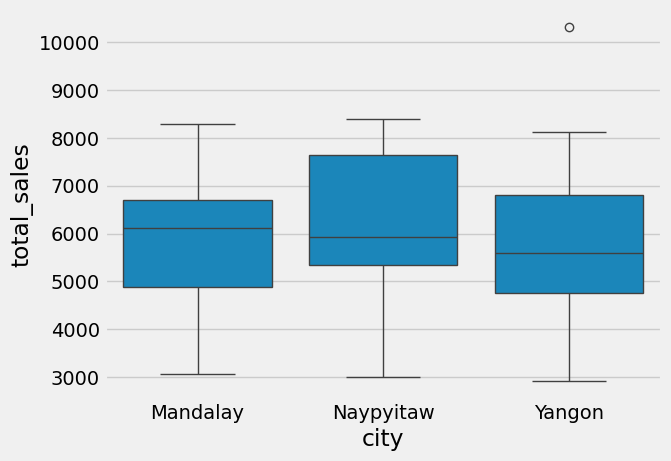

In [117]:
sns.boxplot(data = df, x='city', y='total_sales')
plt.show()